In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
import numpy as np
data = pd.read_csv('MiniBooNE_PID.txt', skiprows = 1,delim_whitespace =True, header = None)
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,4.80718,1.451020,174.6920,0.343481,0.002174,0.000000,0.747401,0.725617,3.18501,0.152208,...,179.832,-2.74376,0.317051,2.67617,0.000000,0.141958,0.723207,7.446300,3.219320,0.299487
130060,5.00527,1.501860,129.9270,0.273477,0.006098,0.109769,1.325370,0.830334,3.40836,0.130794,...,120.794,-24.72180,0.312652,4.16524,0.000000,0.232273,0.141153,1.898750,1.778180,0.258058
130061,3.10842,2.178140,56.3651,0.211850,0.000000,0.167382,1.318900,0.870681,3.43055,0.279588,...,83.082,-34.31190,0.360148,8.16491,0.000000,0.124182,0.016155,0.789276,0.730342,0.152876
130062,5.44560,1.845700,103.4630,0.287411,0.015929,0.107495,0.679931,0.786533,3.47714,0.193390,...,170.225,16.61940,0.164154,5.83085,0.000000,0.193383,-0.397099,2.872590,0.819867,0.210619


### 1.Train-test split

In [17]:
#τα γεγονοτα σηματος αποθηκευονται στο sig και υποβαθρου το pkg
sig = data[0:36500]
bkg = data[36500:]
sig = sig[sig[0] > -500.0]
bkg = bkg[bkg[0] > -500.0] 
from sklearn.model_selection import train_test_split
train_sig, test_sig = train_test_split(sig, train_size = 18000,  test_size =18000 )
train_bkg, test_bkg = train_test_split(bkg,train_size =18000,test_size=18000)

### 2.train Histogram

NotADirectoryError: [Errno 20] Not a directory: 'histograms/metavliti1.jpg'

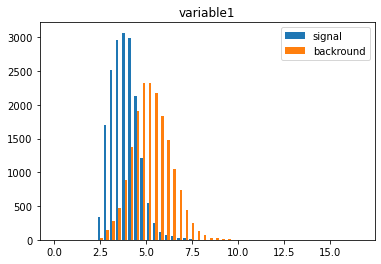

In [12]:
#dont run this!!! it has been run!
for i in range(50):
    plt.hist([train_sig[i],train_bkg[i]], bins = 50,label = ["signal", "backround"])
    title = "variable" + str(i+1)
    plt.title(title)
    plt.legend(loc='upper right')
    savefile = 'histograms/metavliti' + str(i+1) + '.jpg'
    plt.savefig(savefile)
    plt.close()

<AxesSubplot:>

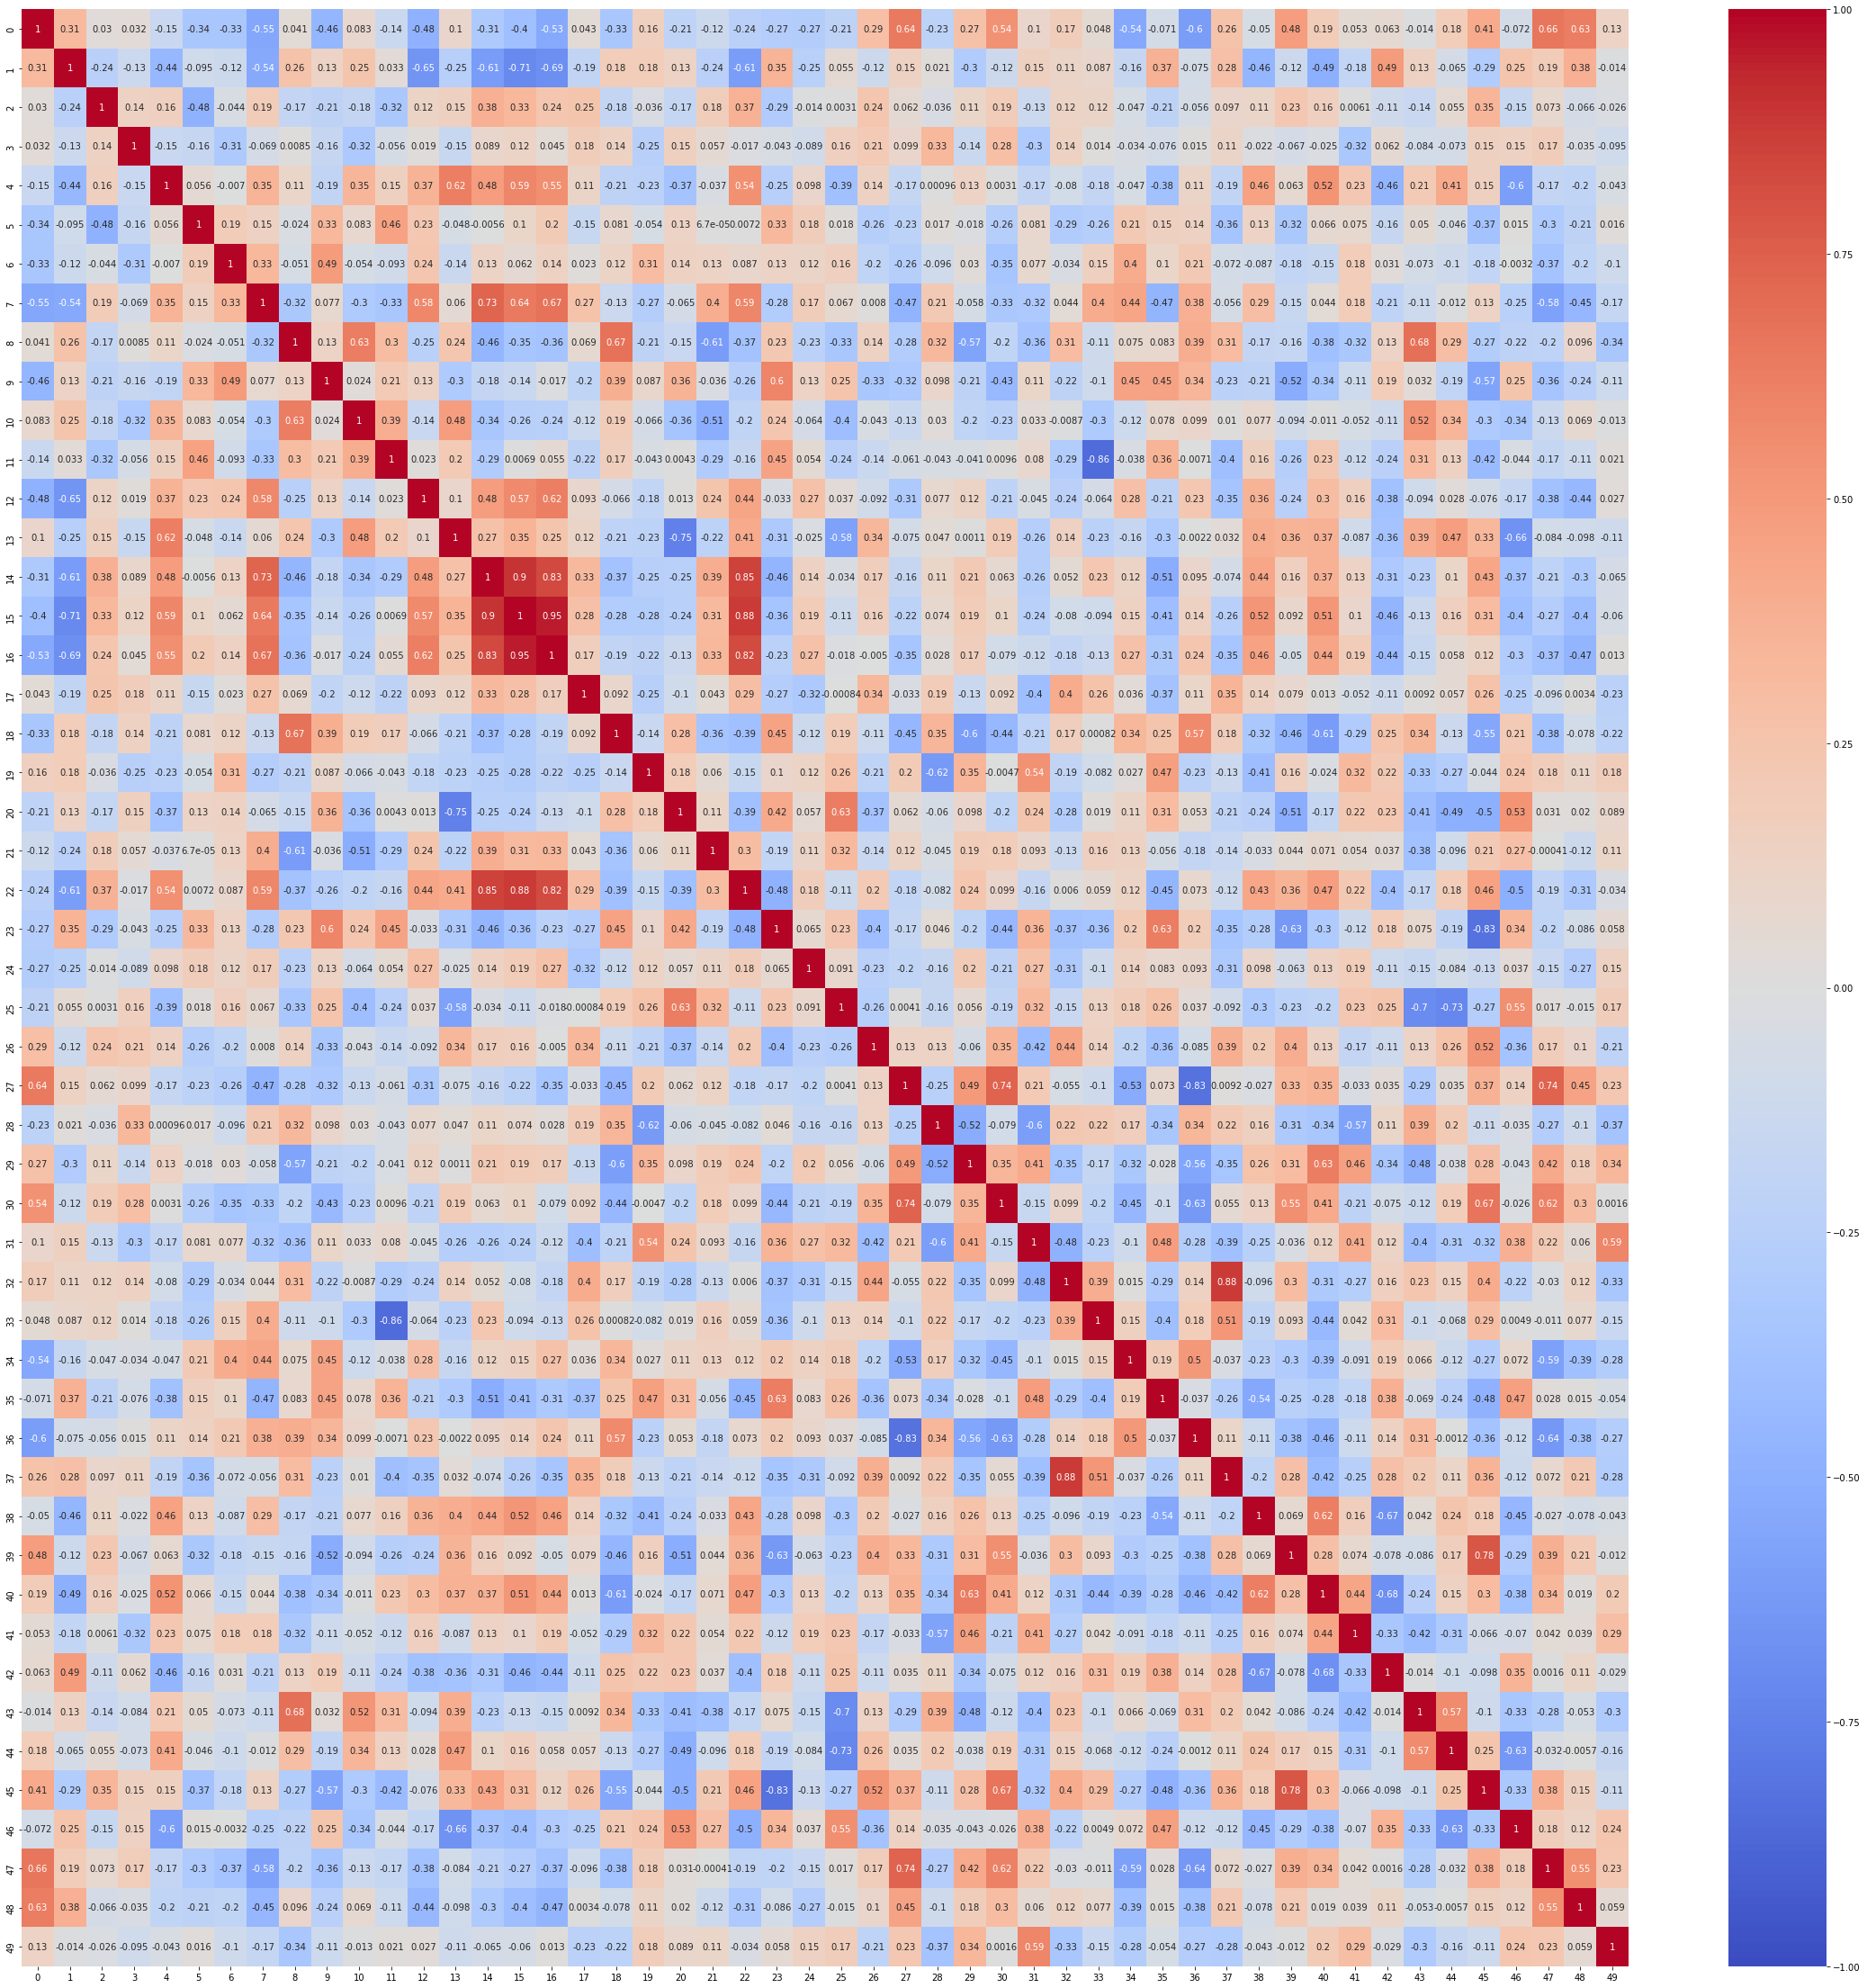

In [13]:
#corelation headmaps
corrTrain_sig = train_sig.corr()
corrTrain_bkg = train_bkg.corr()
plt.figure(figsize = (40,40))
seaborn.heatmap(corrTrain_sig,annot = True, vmin= -1,vmax = 1,cmap = 'coolwarm')


<AxesSubplot:>

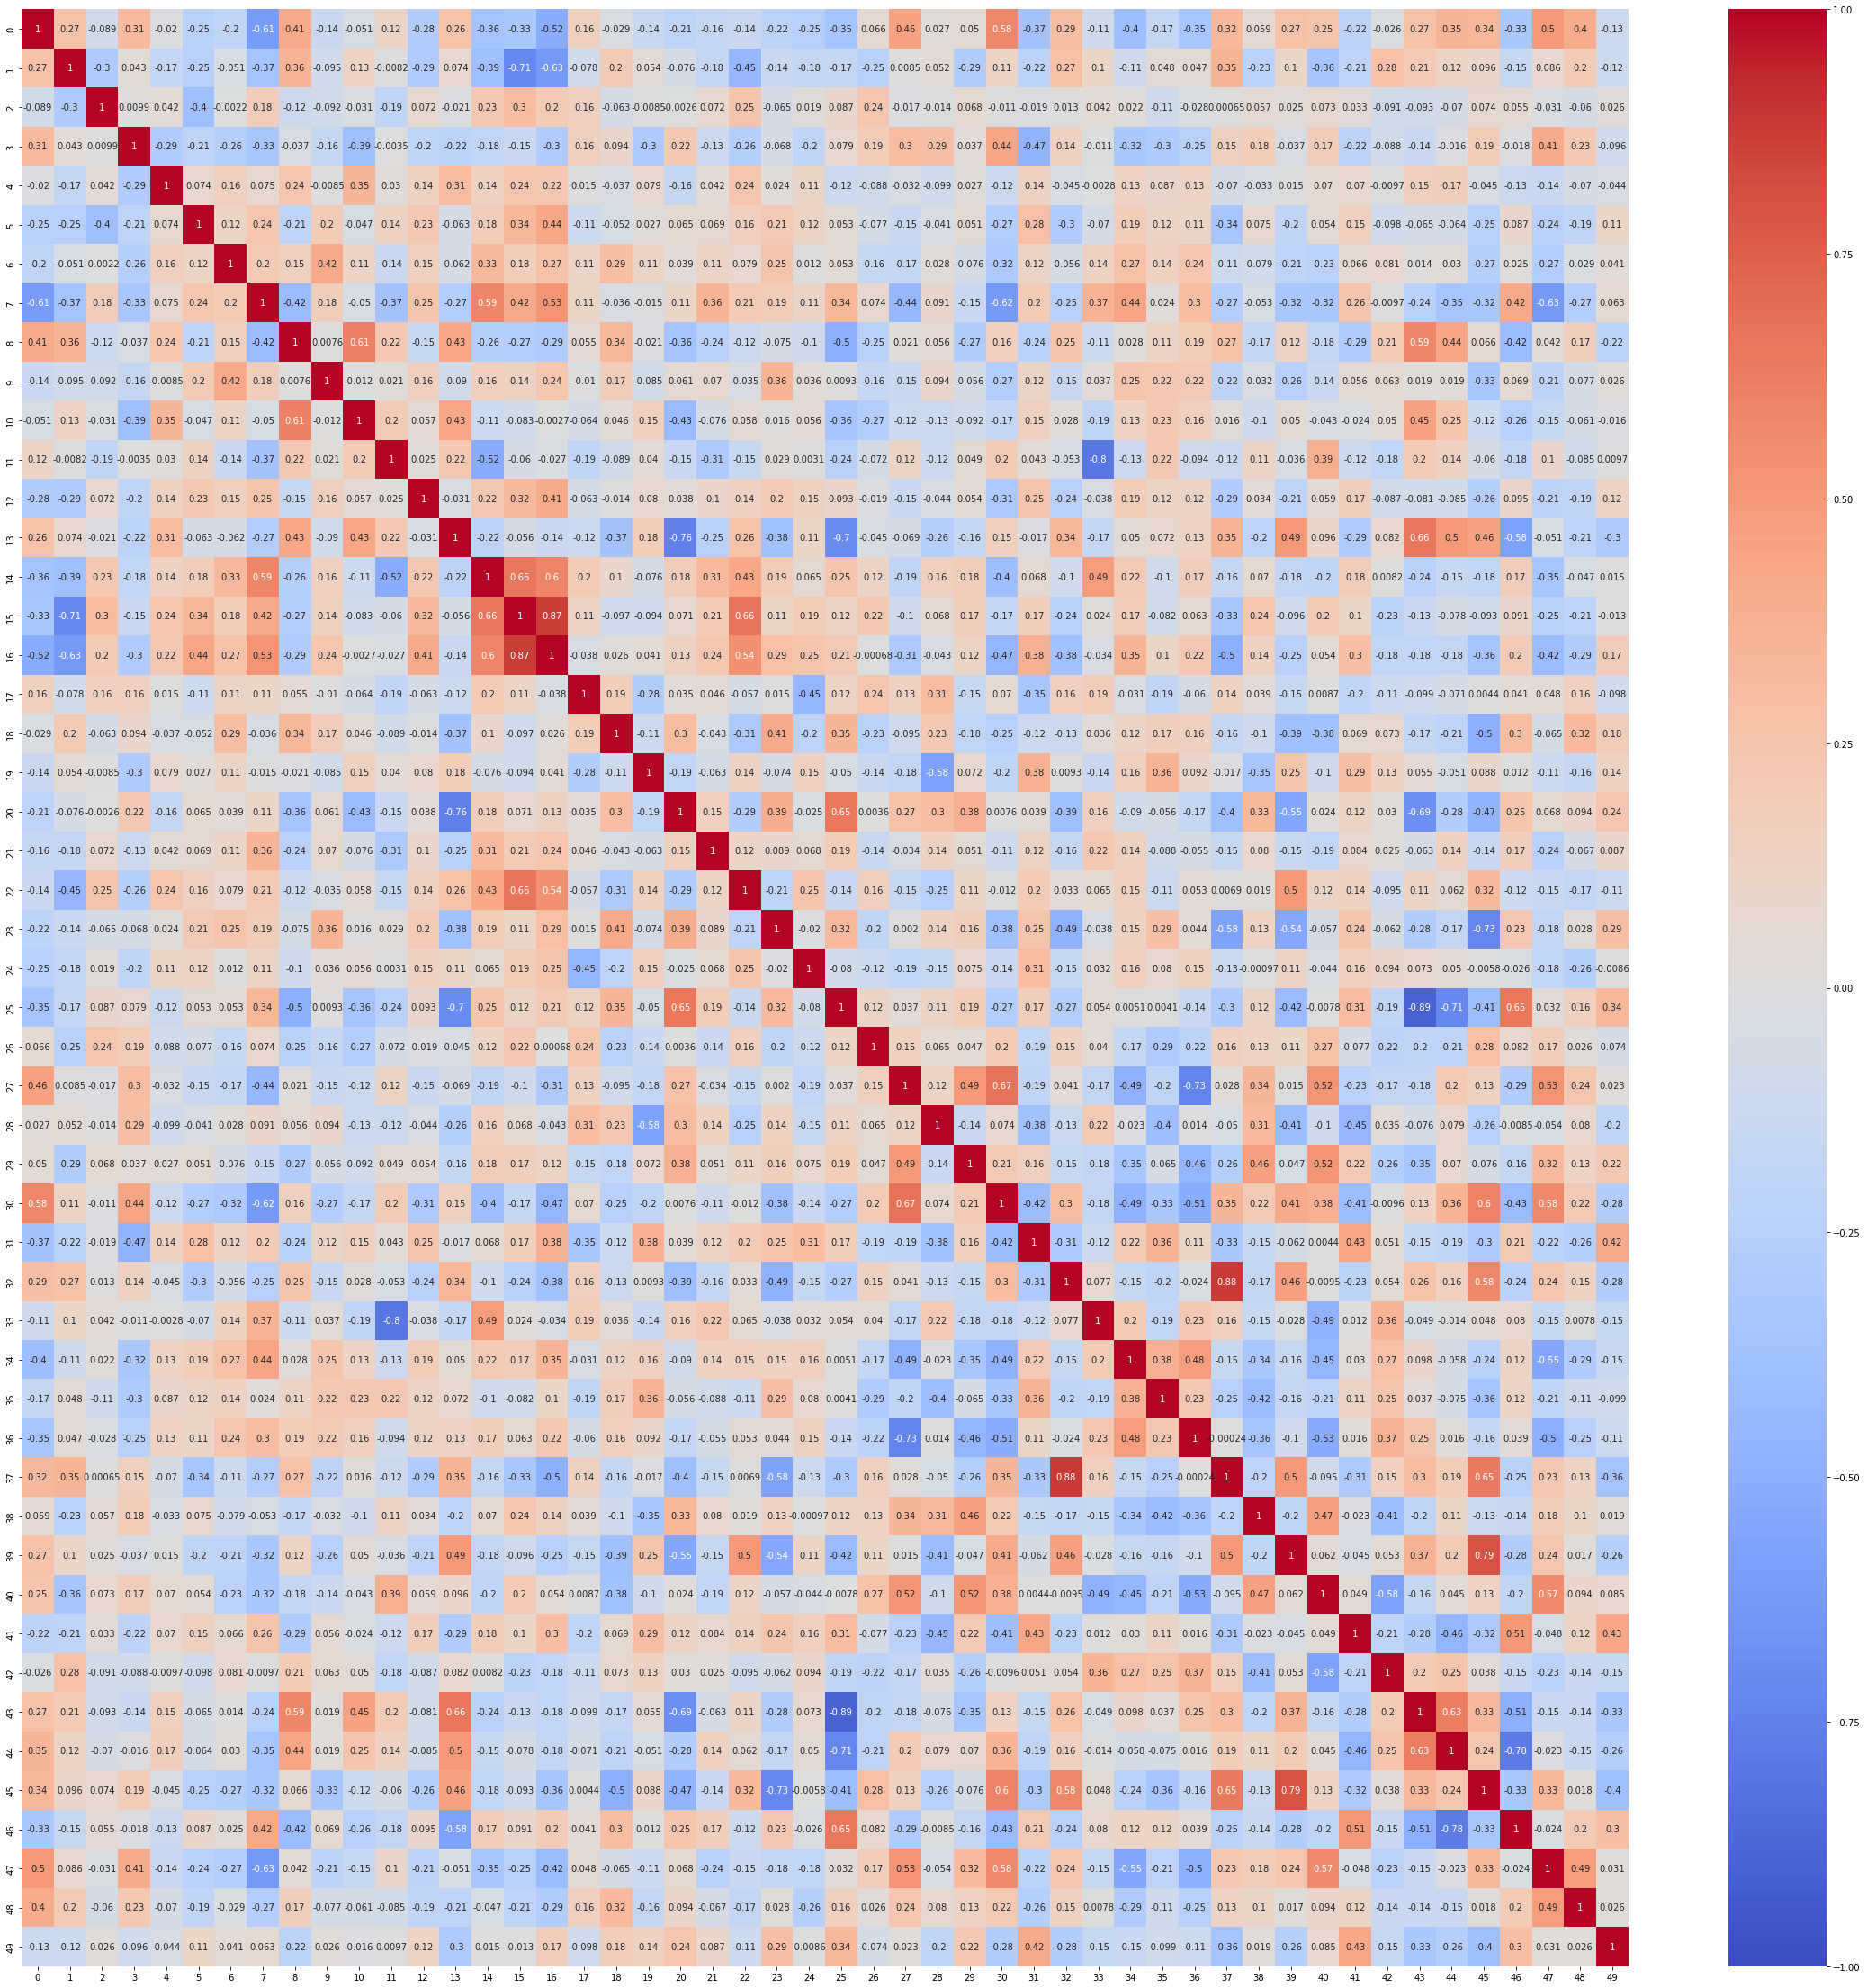

In [50]:
plt.figure(figsize = (40,40))
seaborn.heatmap(corrTrain_bkg,annot = True, vmin = -1, vmax = 1, cmap='coolwarm')

In [52]:
#erothma 4 
data_train = pd.concat([train_sig, train_bkg])

In [53]:
data_train_standardized = (data_train-data_train.mean())/data_train.std()

In [54]:
cov_matrix = data_train_standardized.cov()

<function matplotlib.pyplot.show(close=None, block=None)>

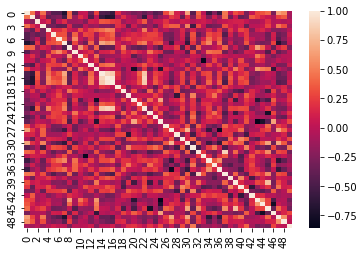

In [55]:
seaborn.heatmap(cov_matrix, fmt='g')
plt.show

In [34]:
from sklearn.decomposition import PCA
pca = PCA()
data_train_scaled_transformed = pca.fit_transform(data_train_standardized)

In [56]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues

array([1.11298705e+01, 6.17151214e+00, 5.35377441e+00, 4.30221427e+00,
       3.28453070e+00, 1.86416554e+00, 1.59768721e+00, 1.35246979e+00,
       1.19748867e+00, 1.00795684e+00, 9.55268857e-01, 8.33533072e-01,
       8.36260948e-01, 7.57597320e-01, 6.96534073e-01, 6.38470036e-01,
       5.81752156e-01, 5.34786296e-01, 4.98866144e-01, 4.85337965e-01,
       4.45477011e-01, 4.22654831e-01, 3.95457808e-01, 3.75196556e-01,
       3.66060254e-01, 3.52288057e-01, 3.38966873e-01, 3.25041330e-01,
       2.99135768e-01, 2.82686428e-01, 2.71246580e-01, 2.50812628e-01,
       2.17843883e-01, 1.05581982e-02, 1.95042047e-01, 1.79119756e-01,
       1.58346224e-01, 2.88998660e-02, 4.55936023e-02, 5.08776095e-02,
       5.45782464e-02, 6.66013840e-02, 6.94016201e-02, 1.25982749e-01,
       8.01383089e-02, 8.63528273e-02, 1.17762896e-01, 9.40134088e-02,
       1.09869781e-01, 1.03916552e-01])

<AxesSubplot:ylabel='Count'>

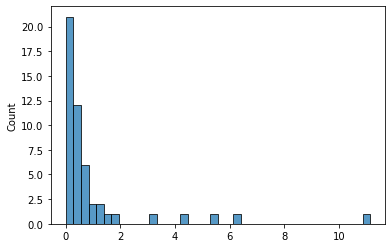

In [57]:
seaborn.histplot(eigenvalues, bins = 40,label="lolmnjb")

In [47]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data_train_scaled_transformed)

In [58]:
principalComponents.shape

(36000, 50)

Erotima 7: Nevroniko

In [83]:
sig_target = np.ones(18000)
bkg_target = np.zeros(18000)

target_vars = np.append(sig_target, bkg_target)


In [87]:
target_vars

array([1., 1., 1., ..., 0., 0., 0.])

In [67]:
import sklearn
from sklearn.neural_network import MLPClassifier

In [105]:
neural_network = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes = (40),
    activation = "logistic",
    verbose = False,
    max_iter = 800
)


neural_network.fit(data_train, target_vars)

MLPClassifier(activation='logistic', hidden_layer_sizes=40, max_iter=800)

In [100]:
neural_network.predict_proba(test_bkg)[:,1]

array([5.87110354e-02, 8.57597236e-04, 2.50698280e-04, ...,
       1.19421073e-02, 6.95973473e-01, 1.08482676e-03])

In [92]:
neural_network.predict_proba(test_sig)[:,1]

array([0.96914338, 0.97431787, 0.98213264, ..., 0.86906615, 0.99050475,
       0.40366907])

In [96]:
data_test = pd.concat([test_sig, test_bkg])

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(neural_network.predict(data_test), target_vars)

0.5043055555555556

In [102]:
accuracy_score(neural_network.predict(data_train), target_vars)

0.927

Erotima 8: Dentra

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosted_trees = GradientBoostingClassifier(
    n_estimators = 200,
    learning_rate = 0.05, 
    max_depth = 3,
    subsample = 0.5, 
    validation_fraction=0.1,
    n_iter_no_change=20,
    max_features = 'log2',
    verbose = 1
)

In [109]:
gradient_boosted_trees.fit(data_train, target_vars)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3468           0.0379           15.79s
         2           1.3102           0.0369           12.51s
         3           1.2656           0.0451           11.76s
         4           1.2327           0.0329           12.55s
         5           1.2033           0.0274           12.06s
         6           1.1772           0.0277           11.21s
         7           1.1528           0.0231           10.75s
         8           1.1196           0.0330           10.35s
         9           1.0920           0.0275           11.56s
        10           1.0691           0.0243           11.74s
        20           0.8890           0.0143            9.69s
        30           0.7752           0.0097            9.10s
        40           0.6976           0.0060            9.29s
        50           0.6371           0.0040            9.35s
        60           0.5962           0.0022            9.40s
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=200, n_iter_no_change=20, subsample=0.5,
                           verbose=1)

In [111]:
accuracy_score(gradient_boosted_trees.predict(data_test), target_vars)

0.921